## k-shingles

In [23]:
import os
import requests
import random
import gzip
import io
import re
import binascii
import itertools
from time import time


In [24]:
# Function to download and unzip the BibTeX file
def download_and_unzip_bibtex(url):
    response = requests.get(url)
    bibtex_gz_data = io.BytesIO(response.content)

    with gzip.open(bibtex_gz_data, "rt", encoding="utf-8") as f:
        # Read and display the first few lines
        for _ in range(70):
            print(f.readline().strip())


In [25]:
bib_url = "https://aclanthology.org/anthology+abstracts.bib.gz"
print("Displaying the first few lines of the BibTeX file:")
download_and_unzip_bibtex(bib_url)

Displaying the first few lines of the BibTeX file:
% https://aclanthology.org/anthology+abstracts.bib.gz generated on 2024-02-29

@proceedings{yrrsds-2023-young,
title = "Proceedings of the 19th Annual Meeting of the Young Reseachers' Roundtable on Spoken Dialogue Systems",
editor = "Hudecek, Vojtech  and
Schmidtova, Patricia  and
Dinkar, Tanvi  and
Chiyah-Garcia, Javier  and
Sieinska, Weronika",
month = sep,
year = "2023",
address = "Prague, Czechia",
publisher = "Association for Computational Linguistics",
url = "https://aclanthology.org/2023.yrrsds-1.0",
}
@inproceedings{chiyah-garcia-2023-processing,
title = "Processing Referential Ambiguities in Situated Dialogue Systems",
author = "Chiyah-Garcia, Javier",
editor = "Hudecek, Vojtech  and
Schmidtova, Patricia  and
Dinkar, Tanvi  and
Chiyah-Garcia, Javier  and
Sieinska, Weronika",
booktitle = "Proceedings of the 19th Annual Meeting of the Young Reseachers' Roundtable on Spoken Dialogue Systems",
month = sep,
year = "2023",
address =

In [26]:
# Function to download and unzip the BibTeX file
def download_and_unzip_bibtex(url):
    response = requests.get(url)
    bibtex_gz_data = io.BytesIO(response.content)

    with gzip.open(bibtex_gz_data, "rt", encoding="utf-8") as f:
        return f.read()

# Function to extract titles, abstracts, editors, authors, and publishers from the BibTeX data
def extract_titles_and_abstracts(bibtex_data):
    titles_and_abstracts = re.findall(r'title = "(.*?)".*?abstract = "(.*?)".*?editor = "(.*?)".*?author = "(.*?)".*?publisher = "(.*?)".*?url = "(.*?)",', bibtex_data, re.DOTALL)
    return titles_and_abstracts


# Function to randomly select titles and abstracts
def select_random_titles_and_abstracts(titles_and_abstracts, num_samples):
    return random.sample(titles_and_abstracts, k=num_samples)

# Function to save titles, abstracts, editors, authors, and publishers into text files
def save_titles_and_abstracts(titles_and_abstracts):
    folder_name = "project1"
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    for idx, (title, abstract, editor, author, publisher, url) in enumerate(titles_and_abstracts, 1):
        file_name = f"{idx}.txt"
        file_path = os.path.join(folder_name, file_name)
        with open(file_path, "w", encoding="utf-8") as file:
            file.write(f"URL: {url}\nTitle: {title}\nAbstract:\n{abstract}\nEditor: {editor}\nAuthor: {author}\nPublisher: {publisher}\n")



#Create 1000 random files

In [27]:
bib_url = "https://aclanthology.org/anthology+abstracts.bib.gz"
print("Downloading and extracting titles and abstracts...")
bibtex_data = download_and_unzip_bibtex(bib_url)
titles_and_abstracts = extract_titles_and_abstracts(bibtex_data)
selected_titles_and_abstracts = select_random_titles_and_abstracts(titles_and_abstracts, 1000)    # 1000 random files
# Save selected titles and abstracts into text files
save_titles_and_abstracts(selected_titles_and_abstracts)
print("Randomly selected titles and abstracts saved to text files in project1 folder.")

Randomly selected titles and abstracts saved to text files in project1 folder.


# k-shingles = 3, 5 and 10, similarity thresholds s=0.1 and 0.2  running without 50 hashing function.

In [29]:
# Function to read all text files in a folder
def get_fnames():
    """Read all text files in a folder.
    """
    fnames = []
    for root,_,files in os.walk("./project1"):
        for fname in files:
            if fname[-4:] == ".txt":
                fnames.append(os.path.join(root, fname))
    return fnames

In [30]:
print("number of different files: {}".format(len(get_fnames())))

number of different files: 1000


In [31]:
def read_file(fname):
    with open(fname, 'r', errors='ignore') as f:
        for line in f:
            if "Abstract:" in line:
                break
        abstract = ' '.join([line[:-1].strip() for line in f])
        abstract = re.sub(' +', ' ', abstract)
        return abstract

In [32]:
fname = get_fnames()[10]
print(fname)
print('')
print(read_file(fname))

./project1/385.txt

We examine whether some countries are more richly represented in embedding space than others. We find that countries whose names occur with low frequency in training corpora are more likely to be tokenized into subwords, are less semantically distinct in embedding space, and are less likely to be correctly predicted: e.g., Ghana (the correct answer and in-vocabulary) is not predicted for, {``}The country producing the most cocoa is [MASK].{''}. Although these performance discrepancies and representational harms are due to frequency, we find that frequency is highly correlated with a country{'}s GDP; thus perpetuating historic power and wealth inequalities. We analyze the effectiveness of mitigation strategies; recommend that researchers report training word frequencies; and recommend future work for the community to define and design representational guarantees. Editor: Muresan, Smaranda and Nakov, Preslav and Villavicencio, Aline Author: Li, Xinjian and Metze, Flor

In [33]:
# Function to get shingles from a file
def get_shingles(fname, k):
    with open(fname, 'r', errors='ignore') as f:
        for line in f:
            if "Abstract:" in line:
                break
        abstract = ' '.join([line[:-1].strip() for line in f])
        abstract = re.sub(' +', ' ', abstract)

        L = len(abstract)
        shingles = set()
        for i in range(L - k + 1):
            shingle = abstract[i:i + k]
            crc = binascii.crc32(shingle.encode('utf-8'))
            shingles.add(crc)
        return shingles

In [34]:
fname = get_fnames()[1]
print("file: {}".format(fname))
print("number of shingles: {}".format(len(get_shingles(fname, k=3))))
print("number of shingles: {}".format(get_shingles(fname, k=3)))

file: ./project1/782.txt
number of shingles: 826
number of shingles: {2901186566, 1559986182, 64745486, 4274397200, 2414063635, 623695891, 1118289941, 2148020246, 3424796695, 3860023320, 1851099161, 2232639510, 4050454553, 1209514012, 3703844895, 2529175585, 2396239908, 1039822885, 3144224807, 789096487, 1475829805, 1324896304, 2316480561, 3442260019, 184913975, 3604918328, 1541404728, 3987847224, 1295802427, 1511979067, 1710716985, 1595932734, 1690916927, 982294595, 1012109389, 3914901583, 488679505, 4046807125, 111140953, 1109729369, 4026968156, 2012541031, 636309613, 1425791090, 3815846004, 784849021, 2508312701, 3960539263, 4144955520, 955357314, 779806855, 2670217361, 3633320082, 3010740371, 378151062, 3035627671, 3469475992, 554700952, 3657623705, 1660176537, 4230504607, 3678193823, 2609201319, 4276453547, 4047134892, 2246723757, 4076071085, 1351207084, 1859029168, 680853675, 2704281778, 4191455410, 3053385907, 2769848507, 3660722363, 2574618814, 4069638335, 3659847882, 265706517

In [35]:
fnames = get_fnames()
shingles_vectors = []

for file in fnames[:20]:
    sh = list(get_shingles(file, k=3))
    shingles_vectors.append(sh)

In [36]:
# Function to calculate Jaccard similarity score
def jaccard_similarity_score(x, y):
    intersection_cardinality = len(set(x).intersection(set(y)))
    union_cardinality = len(set(x).union(set(y)))

    if union_cardinality == 0:
        return 0.0  # Return 0 if union cardinality is zero to avoid division by zero
    else:
        return intersection_cardinality / float(union_cardinality)


In [37]:
jaccard_similarity_score(shingles_vectors[19], shingles_vectors[10])

0.23664825046040516

In [38]:
# Function to detect similar documents
def detect_similar_documents(fnames, k, threshold):
    candidates = []
    for pair in itertools.combinations(fnames, 2):
        js = jaccard_similarity_score(get_shingles(pair[0], k), get_shingles(pair[1], k))
        if js > threshold:
            print(f"Pair {pair} is similar (Jaccard similarity score: {js})")
            candidates.append(pair)
    return candidates


In [ ]:
# Main function
def main():
    # Get file names
    fnames = get_fnames()

    # Define parameters
    k_values = [3, 5, 10]
    thresholds = [0.1, 0.2]

    # Perform similarity detection for each combination of parameters
    for k in k_values:
        for threshold in thresholds:
            print(threshold , k)
            start_time = time()
            candidates = detect_similar_documents(fnames, k, threshold)
            end_time = time()
            execution_time = end_time - start_time
            print(f"K-Shingles: {k}, Threshold: {threshold}, Number of similar items: {len(candidates)}, Execution Time: {execution_time:.2f} seconds")

# Run the main function if this script is executed
if __name__ == "__main__":
    main()



Streaming output truncated to the last 5000 lines.
Pair ('./project1/367.txt', './project1/890.txt') is similar (Jaccard similarity score: 0.10096153846153846)
Pair ('./project1/367.txt', './project1/713.txt') is similar (Jaccard similarity score: 0.10165118679050568)
Pair ('./project1/269.txt', './project1/270.txt') is similar (Jaccard similarity score: 0.10303030303030303)
Pair ('./project1/269.txt', './project1/279.txt') is similar (Jaccard similarity score: 0.10526315789473684)
Pair ('./project1/269.txt', './project1/370.txt') is similar (Jaccard similarity score: 0.10561689870379261)
Pair ('./project1/269.txt', './project1/26.txt') is similar (Jaccard similarity score: 0.13202112337974076)
Pair ('./project1/269.txt', './project1/704.txt') is similar (Jaccard similarity score: 0.10666086199390509)
Pair ('./project1/269.txt', './project1/529.txt') is similar (Jaccard similarity score: 0.10189677988531098)
Pair ('./project1/269.txt', './project1/862.txt') is similar (Jaccard similari

In [ ]:
print(read_file('./project1/185.txt'))
print('')
print(read_file('./project1/729.txt'))

We present a subword regularization method for WordPiece, which uses a maximum matching algorithm for tokenization. The proposed method, MaxMatch-Dropout, randomly drops words in a search using the maximum matching algorithm. It realizes finetuning with subword regularization for popular pretrained language models such as BERT-base. The experimental results demonstrate that MaxMatch-Dropout improves the performance of text classification and machine translation tasks as well as other subword regularization methods. Moreover, we provide a comparative analysis of subword regularization methods: subword regularization with SentencePiece (Unigram), BPE-Dropout, and MaxMatch-Dropout. Editor: Calzolari, Nicoletta and Huang, Chu-Ren and Kim, Hansaem and Pustejovsky, James and Wanner, Leo and Choi, Key-Sun and Ryu, Pum-Mo and Chen, Hsin-Hsi and Donatelli, Lucia and Ji, Heng and Kurohashi, Sadao and Paggio, Patrizia and Xue, Nianwen and Kim, Seokhwan and Hahm, Younggyun and He, Zhong and Lee, T

# K-shingles and use 50 hash functions

In [40]:
import numpy as np
from time import time


In [41]:
# This function was not used finally , just checked
def get_shingles_hash1(fname, k, num_hash_functions):
    with open(fname, 'r', errors='ignore') as f:
        for line in f:
            if "Abstract:" in line:
                break
        abstract = ' '.join([line[:-1].strip() for line in f])
        abstract = re.sub(' +', ' ', abstract)

        L = len(abstract)
        shingles = set()
        for i in range(L - k + 1):
            shingle = abstract[i:i + k]
            shingles.add(shingle)

        # Generate hash functions
        hash_functions = [hashfunc for hashfunc in range(1, num_hash_functions + 1)]
        hash_values = []

        # Calculate minhash values
        for hf in hash_functions:
            min_hash = float('inf')
            for shingle in shingles:
                crc = binascii.crc32(shingle.encode('utf-8')) & 0xffffffff
                hash_value = (hf * crc) % (2**32 - 1)
                min_hash = min(min_hash, hash_value)
                hash_values.append(min_hash)

        return hash_values


In [42]:
# Function to get shingles from a file using multiple hash functions
def get_shingles_hash(fname, k, num_hash_functions):
    hash_functions = [hash_function(i) for i in range(num_hash_functions)]

    with open(fname, 'r', errors='ignore') as f:
        for line in f:
            if "Abstract:" in line:
                break
        abstract = ' '.join([line[:-1].strip() for line in f])
        abstract = re.sub(' +', ' ', abstract)

        L = len(abstract)
        shingles = set()
        for i in range(L - k + 1):
            shingle = abstract[i:i + k]
            # Hash each shingle using hash functions for MinHashing
            hashes = [h(shingle) for h in hash_functions]
            # Add each hash value individually to the shingles set
            for h in hashes:
                shingles.add(h)
        return shingles


In [43]:
# Hash function for MinHashing
def hash_function(seed):
    def hash_shingle(shingle):
        return binascii.crc32((shingle + str(seed)).encode('utf-8'))
    return hash_shingle


In [44]:
fname = get_fnames()[1]
print("file: {}".format(fname))
print("number of shingles: {}".format(len(get_shingles_hash(fname, k=3 ,num_hash_functions=2))))
print("number of shingles: {}".format(get_shingles_hash(fname, k=3,num_hash_functions=2)))

file: ./project1/782.txt
number of shingles: 1652
number of shingles: {3155255296, 1414987784, 1220386824, 4101423138, 911114275, 2635145254, 687013929, 3322716206, 3288743989, 4007116854, 1848746046, 3017941061, 2131279948, 2881200209, 1120419922, 915349593, 970981475, 3551297636, 968736870, 160465012, 1992982658, 2104098953, 1563328650, 3197321355, 810934416, 2229239953, 3122684063, 116064417, 3615686834, 3480559800, 4172800193, 3038855361, 696393923, 850985154, 3469803731, 3211477, 3604299990, 2657804503, 3270508759, 4029604061, 3486441696, 2456461543, 3509493999, 2643296496, 3949093109, 2952257788, 2668060929, 3496976646, 178725130, 2341306634, 719667470, 1511833870, 205725972, 1554317589, 2213396757, 3172081947, 1501069596, 838074659, 789856556, 2751742258, 2751316283, 3099517244, 652542270, 1398161744, 656204112, 4070179154, 764346711, 1887756634, 2680881508, 1163436394, 1876222316, 3272016249, 3575873915, 3534733695, 3370500480, 3854041479, 1880637836, 2875457934, 501514644, 340

In [45]:
fnames = get_fnames()
shingles_vectors = []

for file in fnames[:20]:
    sh = list(get_shingles_hash(file, k=3,num_hash_functions=2))
    shingles_vectors.append(sh)

In [46]:
jaccard_similarity_score(shingles_vectors[19], shingles_vectors[10])

0.23664825046040516

In [47]:
# Function to detect similar documents
def detect_similar_documents_hash(fnames, k, threshold, num_hash_functions):
    candidates = []
    for pair in itertools.combinations(fnames, 2):
        shingles_1 = get_shingles_hash(pair[0], k, num_hash_functions)
        shingles_2 = get_shingles_hash(pair[1], k, num_hash_functions)
        js = jaccard_similarity_score(shingles_1, shingles_2)
        if js > threshold:
            print(f"Pair {pair} is similar (Jaccard similarity score: {js})")
            candidates.append(pair)
    return candidates

In [ ]:
# Main function
def main():
    # Get file names
    fnames = get_fnames()

    # Define parameters
    k_values = [3, 5, 10]
    thresholds = [0.1, 0.2]
    num_hash_functions = 50

    # Perform similarity detection for each combination of parameters
    for k in k_values:
        for threshold in thresholds:
            print(k,threshold)
            start_time = time()
            candidates = detect_similar_documents_hash(fnames, k, threshold, num_hash_functions)
            end_time = time()
            execution_time = end_time - start_time
            print(f"K-Shingles: {k}, Threshold: {threshold}, Number of similar items: {len(candidates)}, Execution Time: {execution_time:.2f} seconds")

# Run the main function if this script is executed
if __name__ == "__main__":
    main()

Streaming output truncated to the last 5000 lines.
Pair ('./project1/764.txt', './project1/447.txt') is similar (Jaccard similarity score: 0.10355029585798817)
Pair ('./project1/764.txt', './project1/250.txt') is similar (Jaccard similarity score: 0.10388476647752073)
Pair ('./project1/764.txt', './project1/569.txt') is similar (Jaccard similarity score: 0.10795454545454546)
Pair ('./project1/764.txt', './project1/116.txt') is similar (Jaccard similarity score: 0.1063231850117096)
Pair ('./project1/764.txt', './project1/516.txt') is similar (Jaccard similarity score: 0.1218469431380932)
Pair ('./project1/764.txt', './project1/465.txt') is similar (Jaccard similarity score: 0.10712761416986769)
Pair ('./project1/764.txt', './project1/696.txt') is similar (Jaccard similarity score: 0.10308407266582172)
Pair ('./project1/764.txt', './project1/617.txt') is similar (Jaccard similarity score: 0.10453117990130104)
Pair ('./project1/764.txt', './project1/335.txt') is similar (Jaccard similarit

In [ ]:
print(read_file('./project1/632.txt'))
print('')
print(read_file('./project1/447.txt'))

Data augmentation with mixup has shown to be effective on the NLP tasks. Although its great success, the mixup still has shortcomings. First, vanilla mixup randomly selects one sample to generate the mixup sample for a given sample. It remains unclear how to best choose the input samples for the mixup. Second, linear interpolation limits the space of synthetic data and its regularization effect. In this paper, we propose the dynamic nonlinear mixup with distance-based sample selection, which not only generates multiple sample pairs based on the distance between each sample but also enlarges the space of synthetic samples. Specifically, we compute the distance between each input data by cosine similarity and select multiple samples for a given sample. Then we use the dynamic nonlinear mixup to fuse sample pairs. It does not use a linear, scalar mixing strategy, but a nonlinear interpolation strategy, where the mixing strategy is adaptively updated for the input and label pairs. Experime

## Minhash

In [49]:
# set global parameters to process the whole dataset
import numpy as np
bands = 10
rows = 10
nsig = bands*rows  # number of elements in signature, or the number of different random hash functions

maxShingleID = 2**32-1  # record the maximum shingle ID that we assigned
nextPrime = 4294967311  # next prime number after maxShingleID

A = np.random.randint(0, nextPrime, size=(nsig,),dtype=np.int64)
B = np.random.randint(0, nextPrime, size=(nsig,),dtype=np.int64)

In [50]:
print(len(A),A)

100 [1207426077 4019887313 3813573579  955376018 1043248255 1531652576
 3539811498 3653906834 3186280256 2374822192  160777957 3395646828
  920097387  613462027  277480921  825500312 1699198232 3460049046
 2872497445 2015205059 2369476003 4264742834 3366741200 2812257629
 3653784675 2620845066 2269596803 1534441650   21842076 2296140673
 3289716524 1972594318 2667014057  687713661 1532845827   14818629
 1158163861 3419871779 1373483190 2567647844 4099867717  160355176
 3097371925 1641166343 3639863891 1611799244  650634222  501747877
 1153870152 3883923594 2753834420 2273742223 4270330124 3470262070
 2149679070  186969772  785983125 2339150674  812389748  682051710
  834511410 1113701998 1851257007  577008033 2892593948 2269865129
 1350431695  822902885 2778917735  407416898 1550317231 2987556473
  746803974  681076469 2403425553 3161641526  461063934 1683259292
 3973276124 4179623849  718391087   74068716  908581361 2105305224
   58334816 4289467215 2260646154 2431476981 2490068611 25

In [51]:
ShingleID = list(get_shingles(fname, k=3))[0]

print("random shingle: {}".format(ShingleID))

hashCode = ((A[0]*ShingleID + B[0]) % nextPrime) % maxShingleID
print("its hash code by first hash function: {}".format(hashCode))
hashCode = ((A[1]*ShingleID + B[1]) % nextPrime) % maxShingleID
print("its hash code by second hash function: {}".format(hashCode))

random shingle: 2901186566
its hash code by first hash function: 638079056
its hash code by second hash function: 534149070


<ipython-input-51-c7db47035c25>:7: RuntimeWarning: overflow encountered in scalar multiply
  hashCode = ((A[1]*ShingleID + B[1]) % nextPrime) % maxShingleID


In [52]:
# all shingles from that file are given in 'shingles'

def minhash(shingles, A, B, nextPrime, maxShingleID, nsig):
    signature = []
    for i in range(nsig):  # number of hash functions == nsig
        minHashCode = maxShingleID + 1
        a = A[i]
        b = B[i]

        for ShingleID in shingles:
            hashCode = ((a*ShingleID + b) % nextPrime) % maxShingleID
            if hashCode < minHashCode:
                minHashCode = hashCode

        signature.append(minHashCode)
    return signature

In [53]:
fname = get_fnames()[0]
shingles = get_shingles(fname, k=3)
maxShingleID = 2**32-1  # record the maximum shingle ID that we assigned
nextPrime = 4294967311  # next prime number after maxShingleID

A = np.random.randint(0, nextPrime/2, size=(nsig,),dtype=np.int64)
B = np.random.randint(0, nextPrime/2, size=(nsig,),dtype=np.int64)

signature = minhash(shingles, A, B, nextPrime, maxShingleID, nsig)
print("file signature: {} , {}".format(len(signature),signature))

file signature: 100 , [256724, 2469190, 1042556, 470503, 9945648, 3454159, 4039405, 5236423, 12701151, 21674985, 13654387, 12268569, 10600175, 2542037, 4390459, 11105155, 2996854, 7495899, 6359355, 11256504, 3065535, 4769535, 1968807, 12068023, 1094177, 4319542, 27019866, 1625314, 2652719, 390835, 2701415, 8909709, 4826409, 4242754, 277025, 4862881, 1001542, 640334, 2119048, 2162493, 588867, 5800430, 1915962, 1038434, 16813137, 20220324, 10687298, 23263953, 306763, 6535459, 486370, 765140, 692590, 8739558, 3932473, 1857334, 2923252, 5426989, 7355920, 8473338, 4413898, 2981778, 3209888, 5167817, 710765, 3561143, 5037546, 1565251, 11789919, 1050048, 7184102, 4247106, 6300379, 6667037, 3351038, 2851542, 1403850, 1021326, 275028, 2981181, 3776772, 3960658, 16590423, 3676225, 3480147, 5330568, 8420222, 2751748, 3357580, 4832463, 5400237, 1285727, 3959085, 5841581, 7952686, 3449772, 3746620, 7952764, 1148333, 4102045]


In [54]:
# compute Minhashes for all files using a slow naive code
fnames = get_fnames()
signatures = []
t = time()
for fname in fnames:
    shingles = get_shingles(fname, k=3)
    signature = minhash(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)
t1 = time()-t
print("total signatures: {}".format(len(signatures)))
print("took {} seconds".format(t1))

total signatures: 1000
took 16.367007970809937 seconds


In [55]:
def minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig):
    signature = np.ones((nsig,)) * (maxShingleID + 1)

    for ShingleID in shingles:
        hashCodes = ((A*ShingleID + B) % nextPrime) % maxShingleID
        np.minimum(signature, hashCodes, out=signature)

    return signature

In [56]:
# compare two versions of Minhash code
shingles_all_files = []
for fname in get_fnames():
    shingles_all_files.append(get_shingles(fname, k=3))

t = time()
signatures_all_files_1 = []
for shingles in shingles_all_files:
    signature = minhash(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures_all_files_1.append(signature)
t1 = time()-t
print("slow code took {} seconds".format(t1))

t = time()
signatures_all_files_2 = []
for shingles in shingles_all_files:
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures_all_files_2.append(signature)
t2 = time()-t
print("really fast code took {} seconds".format(t2))

print('speedup {}'.format(t1/t2))

signatures_all_files_1 = np.array(signatures_all_files_1)
signatures_all_files_2 = np.array(signatures_all_files_2)
print("results are the same: {}".format(np.allclose(signatures_all_files_1, signatures_all_files_2)))

slow code took 15.88172459602356 seconds
really fast code took 4.652798175811768 seconds
speedup 3.4133706204122416
results are the same: True


In [57]:
# get candidate pairs without Locality-Sensitive Hashing

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=3)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)



In [ ]:
# Similarity thresholds and numbers of hashing functions to compare

#thresholds = [0.5, 0.9, 0.95]
thresholds = [0.1 , 0.2 , 0.25 ]
#num_hash_functions = [50, 100, 200]
num_hash_functions = [50]
for s in thresholds:
    for num_hashes in num_hash_functions:
        nsig = num_hashes
        A = np.random.randint(0, nextPrime / 2, size=(nsig,), dtype=np.int64)
        B = np.random.randint(0, nextPrime / 2, size=(nsig,), dtype=np.int64)

        t = time()
        candidates = []
        for i in range(len(signatures)):
            for j in range(i + 1, len(signatures)):
                Jsim = np.mean(signatures[i] == signatures[j])
                if Jsim >= s:
                    candidates.append((i, j))
        t2 = time() - t
        print("Similarity threshold: {}, Number of Hash Functions: {}".format(s, num_hashes))
        print("Finding candidates took {} seconds".format(t2))
        print("Found {} candidates".format(len(candidates)))
        for i,j in candidates:
            print(fnames[i], fnames[j])

Streaming output truncated to the last 5000 lines.
./project1/238.txt ./project1/863.txt
./project1/238.txt ./project1/608.txt
./project1/238.txt ./project1/153.txt
./project1/238.txt ./project1/180.txt
./project1/238.txt ./project1/199.txt
./project1/238.txt ./project1/999.txt
./project1/238.txt ./project1/231.txt
./project1/238.txt ./project1/417.txt
./project1/238.txt ./project1/101.txt
./project1/238.txt ./project1/114.txt
./project1/238.txt ./project1/824.txt
./project1/238.txt ./project1/323.txt
./project1/238.txt ./project1/310.txt
./project1/238.txt ./project1/520.txt
./project1/238.txt ./project1/516.txt
./project1/238.txt ./project1/844.txt
./project1/238.txt ./project1/760.txt
./project1/238.txt ./project1/300.txt
./project1/238.txt ./project1/560.txt
./project1/238.txt ./project1/324.txt
./project1/238.txt ./project1/518.txt
./project1/238.txt ./project1/749.txt
./project1/238.txt ./project1/451.txt
./project1/238.txt ./project1/279.txt
./project1/238.txt ./project1/474.txt

In [ ]:
# Similarity thresholds and numbers of hashing functions to compare

#thresholds = [0.5, 0.9, 0.95]
thresholds = [0.5]
num_hash_functions = [50, 100, 200]
#num_hash_functions = [50]
for s in thresholds:
    for num_hashes in num_hash_functions:
        nsig = num_hashes
        A = np.random.randint(0, nextPrime / 2, size=(nsig,), dtype=np.int64)
        B = np.random.randint(0, nextPrime / 2, size=(nsig,), dtype=np.int64)

        t = time()
        candidates = []
        for i in range(len(signatures)):
            for j in range(i + 1, len(signatures)):
                Jsim = np.mean(signatures[i] == signatures[j])
                if Jsim >= s:
                    candidates.append((i, j))
        t2 = time() - t
        print("Similarity threshold: {}, Number of Hash Functions: {}".format(s, num_hashes))
        print("Finding candidates took {} seconds".format(t2))
        print("Found {} candidates".format(len(candidates)))
        for i,j in candidates:
            print(fnames[i], fnames[j])

Similarity threshold: 0.5, Number of Hash Functions: 50
Finding candidates took 46.40291476249695 seconds
Found 108 candidates
./project1/827.txt ./project1/767.txt
./project1/827.txt ./project1/53.txt
./project1/827.txt ./project1/453.txt
./project1/452.txt ./project1/643.txt
./project1/443.txt ./project1/483.txt
./project1/443.txt ./project1/162.txt
./project1/443.txt ./project1/188.txt
./project1/443.txt ./project1/344.txt
./project1/443.txt ./project1/626.txt
./project1/443.txt ./project1/4.txt
./project1/443.txt ./project1/614.txt
./project1/443.txt ./project1/453.txt
./project1/443.txt ./project1/597.txt
./project1/512.txt ./project1/188.txt
./project1/512.txt ./project1/113.txt
./project1/492.txt ./project1/4.txt
./project1/492.txt ./project1/453.txt
./project1/172.txt ./project1/441.txt
./project1/728.txt ./project1/427.txt
./project1/728.txt ./project1/344.txt
./project1/728.txt ./project1/4.txt
./project1/728.txt ./project1/299.txt
./project1/728.txt ./project1/208.txt
./proj

In [ ]:
print(read_file('./project1/120.txt'))
print('')
print(read_file('./project1/608.txt'))

We present an approach to creating corpora for use in detecting deception in text, including a discussion of the challenges peculiar to this task. Our approach is based on soliciting several types of reviews from writers and was implemented using Amazon Mechanical Turk. We describe the multi-dimensional corpus of reviews built using this approach, available free of charge from LDC as the Boulder Lies and Truth Corpus (BLT-C). Challenges for both corpus creation and the deception detection include the fact that human performance on the task is typically at chance, that the signal is faint, that paid writers such as turkers are sometimes deceptive, and that deception is a complex human behavior; manifestations of deception depend on details of domain, intrinsic properties of the deceiver (such as education, linguistic competence, and the nature of the intention), and specifics of the deceptive act (e.g., lying vs. fabricating.) To overcome the inherent lack of ground truth, we have devel

In [ ]:
signatures = np.array(signatures).T
print(signatures.shape)

(100, 1000)


# Task 3 , communities and visualize

In [ ]:
import networkx as nx

# Create an empty graph
G = nx.Graph()

# Add edges based on the obtained similar pairs
for i, j in candidates:
    doc1 = fnames[i]
    doc2 = fnames[j]
    G.add_edge(doc1, doc2)



In [ ]:
# Export the graph to a Gephi-compatible format
nx.write_gexf(G, "network.gexf")


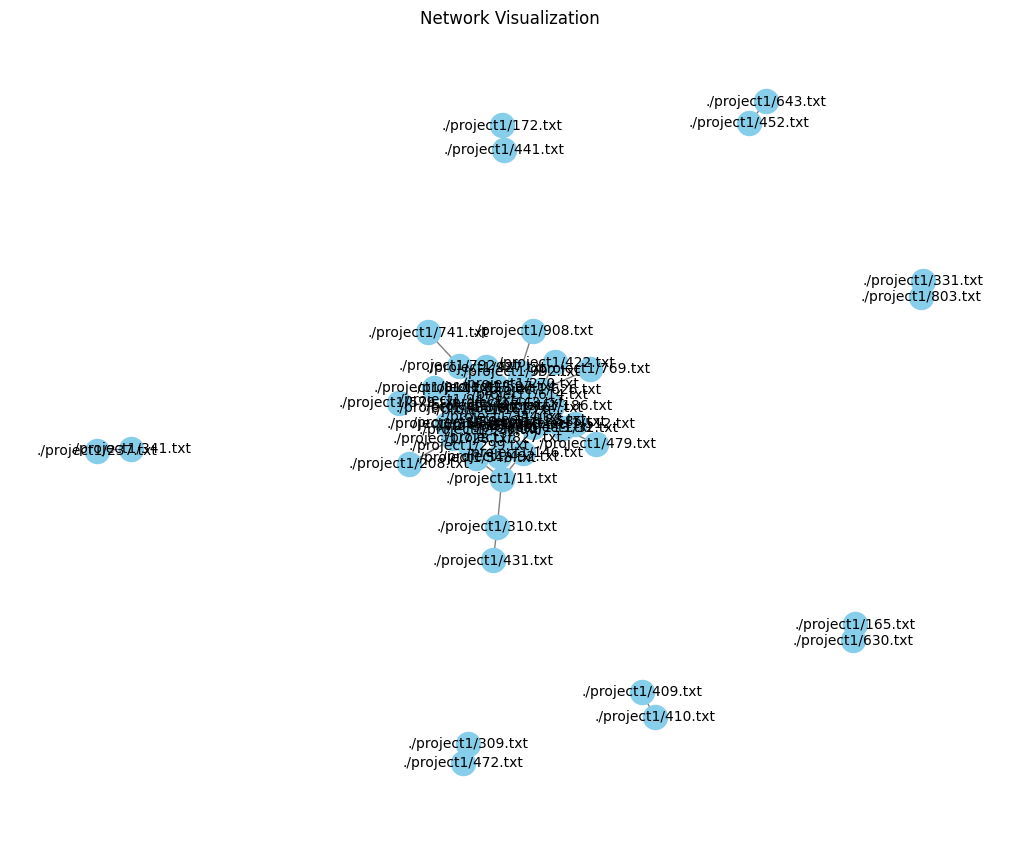

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Positions nodes using Fruchterman-Reingold force-directed algorithm
nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=10, font_color='black', edge_color='gray')
plt.title("Network Visualization")
plt.show()

In [ ]:
# Calculate betweenness centrality for all edges
edge_betweenness = nx.edge_betweenness_centrality(G)

# Use Girvan-Newman method with betweenness centrality
while G.number_of_edges() > 0:
    max_betweenness = max(edge_betweenness.values())
    edge_to_remove = [edge for edge, betweenness in edge_betweenness.items() if betweenness == max_betweenness][0]
    if edge_to_remove in G.edges():
        G.remove_edge(*edge_to_remove)
        components = list(nx.connected_components(G))
        print("Number of communities:", len(components), "Components:", components)
    else:
        break  # Exit loop if there are no more edges to remove or if there's an issue

Number of communities: 9 Components: [{'./project1/208.txt', './project1/927.txt', './project1/767.txt', './project1/626.txt', './project1/299.txt', './project1/162.txt', './project1/422.txt', './project1/113.txt', './project1/823.txt', './project1/11.txt', './project1/548.txt', './project1/585.txt', './project1/186.txt', './project1/614.txt', './project1/344.txt', './project1/728.txt', './project1/512.txt', './project1/792.txt', './project1/492.txt', './project1/453.txt', './project1/579.txt', './project1/53.txt', './project1/811.txt', './project1/769.txt', './project1/4.txt', './project1/270.txt', './project1/479.txt', './project1/908.txt', './project1/188.txt', './project1/827.txt', './project1/483.txt', './project1/427.txt', './project1/146.txt', './project1/32.txt', './project1/955.txt', './project1/947.txt', './project1/741.txt', './project1/443.txt', './project1/992.txt', './project1/597.txt', './project1/930.txt'}, {'./project1/643.txt', './project1/452.txt'}, {'./project1/441.

In [ ]:
import networkx as nx
from networkx.algorithms.community import girvan_newman
from operator import itemgetter
from time import sleep
import itertools

def heaviest(G):
    u, v, w = max(G.edges(data='weight'), key=itemgetter(2))
    return (u, v)       # getting the weights

# Create an empty graph
G = nx.Graph()

# Add edges based on the obtained similar pairs
for i, j in candidates:
    doc1 = fnames[i]
    doc2 = fnames[j]
    G.add_edge(doc1, doc2)

# Calculate betweenness centrality for all edges
comp_b = nx.edge_betweenness_centrality(G, normalized=False)

# Create a new graph
Gw = nx.Graph()
# Add edges with weights
for (a, b), weight in comp_b.items():
    Gw.add_edge(a, b, weight=weight)

# Select different values of k
k_values = [3, 4, 5]

for k in k_values:
    print("K =", k)
    print("Clusters")
    # Perform Girvan-Newman community detection
    comp_gn = girvan_newman(Gw, most_valuable_edge=heaviest)
    # Iterate to the kth community structure
    for idx, communities in enumerate(itertools.islice(comp_gn, k), 1):
        print("Community", idx, ":", communities)
    print("---------")
    sleep(2)


K = 3
Clusters
Community 1 : ({'./project1/208.txt', './project1/927.txt', './project1/767.txt', './project1/626.txt', './project1/299.txt', './project1/162.txt', './project1/422.txt', './project1/113.txt', './project1/823.txt', './project1/11.txt', './project1/548.txt', './project1/585.txt', './project1/186.txt', './project1/614.txt', './project1/344.txt', './project1/728.txt', './project1/512.txt', './project1/792.txt', './project1/492.txt', './project1/453.txt', './project1/579.txt', './project1/53.txt', './project1/811.txt', './project1/769.txt', './project1/4.txt', './project1/270.txt', './project1/479.txt', './project1/908.txt', './project1/188.txt', './project1/827.txt', './project1/483.txt', './project1/427.txt', './project1/146.txt', './project1/32.txt', './project1/955.txt', './project1/947.txt', './project1/741.txt', './project1/443.txt', './project1/992.txt', './project1/597.txt', './project1/930.txt'}, {'./project1/643.txt', './project1/452.txt'}, {'./project1/441.txt', '.

# LSH

In [ ]:
def LSH(signatures, bands, rows, Ab, Bb, nextPrime, maxShingleID):
    """Locality Sensitive Hashing
    """
    numItems = signatures.shape[1]
    signBands = np.array_split(signatures, bands, axis=0)
    candidates = set()
    for nb in range(bands):
        hashTable = {}
        for ni in range(numItems):
            item = signBands[nb][:,ni]
            hash = (np.dot(Ab[nb,:], item) + Bb[nb]) % nextPrime % maxShingleID
            if hash not in hashTable:
                hashTable[hash] = [ni]
            else:
                hashTable[hash].append(ni)
        for _,items in hashTable.items():
            if len(items) > 1:
                L = len(items)
                for i in range(L-1):
                    for j in range(i+1, L):
                        cand = [items[i], items[j]]
                        np.sort(cand)
                        candidates.add(tuple(cand))
    return candidates

In [ ]:
bands = 10
rows = 10
nsig = bands*rows  # number of elements in signature, or the number of different random hash functions

In [ ]:
# find candidates with LSH

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=3)
    signature = minhash(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

# prepare data for LSH
A2 = np.random.randint(0, nextPrime/2, size=(bands, rows),dtype=np.int64)  # now we need a vector of A parameters for each band
B2 = np.random.randint(0, nextPrime/2, size=(bands, ),dtype=np.int64)
signatures = np.array(signatures).T  # LSH needs a matrix of signatures, not a list of vectors

#s = 0.95  #   s almost equal (1/b)**(1/r)
Nfiles = signatures.shape[1]  # number of different files
t = time()
candidates = LSH(signatures, bands, rows, A2, B2, nextPrime, maxShingleID)
t2 = time() - t
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))
print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

finding candidates took 0.09504890441894531 seconds
found 2 candidates
candidate similar pairs of files are:
./project1/315.txt ./project1/21.txt
./project1/131.txt ./project1/894.txt


In [21]:
import numpy as np
from time import time

def is_prime(num):
    if num <= 1:
        return False
    if num <= 3:
        return True
    if num % 2 == 0 or num % 3 == 0:
        return False
    i = 5
    while i * i <= num:
        if num % i == 0 or num % (i + 2) == 0:
            return False
        i += 6
    return True

def next_prime(num):
    next_num = num + 1
    while True:
        if is_prime(next_num):
            return next_num
        next_num += 1

def LSH(signatures, bands, rows, A2, B2, nextPrime, maxShingleID):
    # Implementation of Locality Sensitive Hashing algorithm
    candidates = []  # List to store candidate pairs
    # Your LSH implementation to find candidate pairs goes here
    # Example dummy implementation:
    for i in range(len(signatures)):
        for j in range(i + 1, len(signatures)):
            if np.array_equal(signatures[i], signatures[j]):
                candidates.append((i, j))
    return candidates

# Assume the functions get_fnames(), get_shingles(), and minhash() are defined elsewhere

# Define the number of hashing functions
nsig_50 = 50
nsig_100 = 100
nsig_200 = 200

# Define nextPrime and maxShingleID
nextPrime = 4294967311  # Example value, replace with the actual value
maxShingleID = 2**32 - 1  # Example value, replace with the actual value

# Adjust A and B vectors for each case
A_50 = np.random.randint(0, next_prime(nextPrime)/2, size=(nsig_50,), dtype=np.int64)
B_50 = np.random.randint(0, next_prime(nextPrime)/2, size=(nsig_50,), dtype=np.int64)

A_100 = np.random.randint(0, next_prime(nextPrime)/2, size=(nsig_100,), dtype=np.int64)
B_100 = np.random.randint(0, next_prime(nextPrime)/2, size=(nsig_100,), dtype=np.int64)

A_200 = np.random.randint(0, next_prime(nextPrime)/2, size=(nsig_200,), dtype=np.int64)
B_200 = np.random.randint(0, next_prime(nextPrime)/2, size=(nsig_200,), dtype=np.int64)

# Modify the loop to run for each case
for nsig, A, B in [(nsig_50, A_50, B_50), (nsig_100, A_100, B_100), (nsig_200, A_200, B_200)]:
    signatures = []  # signatures for all files
    fnames = get_fnames()
    for fname in fnames:
        shingles = get_shingles(fname, k=3)
        signature = minhash(shingles, A, B, next_prime(nextPrime), maxShingleID, nsig)
        signatures.append(signature)

    # prepare data for LSH
    bands = 10  # example value, adjust according to your requirement
    rows = nsig // bands  # make sure nsig is divisible by bands
    A2 = np.random.randint(0, next_prime(nextPrime)/2, size=(bands, rows), dtype=np.int64)
    B2 = np.random.randint(0, next_prime(nextPrime)/2, size=(bands,), dtype=np.int64)
    signatures = np.array(signatures).T

    t = time()
    candidates = LSH(signatures, bands, rows, A2, B2, next_prime(nextPrime), maxShingleID)
    t2 = time() - t
    print("For {} hashing functions:".format(nsig))
    print("Finding candidates took {} seconds".format(t2))
    print("Found {} candidates".format(len(candidates)))
    print("Candidate similar pairs of files are:")
    for i, j in candidates:
        print(fnames[i], fnames[j])



For 50 hashing functions:
Finding candidates took 0.011356830596923828 seconds
Found 0 candidates
Candidate similar pairs of files are:
For 100 hashing functions:
Finding candidates took 0.023818492889404297 seconds
Found 0 candidates
Candidate similar pairs of files are:
For 200 hashing functions:
Finding candidates took 0.09367775917053223 seconds
Found 0 candidates
Candidate similar pairs of files are:


In [ ]:
print(read_file('./project1/131.txt'))
print('')
print(read_file('./project1/894.txt'))

Empathy is a complex cognitive ability based on the reasoning of others{'} affective states. In order to better understand others and express stronger empathy in dialogues, we argue that two issues must be tackled at the same time: (i) identifying which word is the cause for the other{'}s emotion from his or her utterance and (ii) reflecting those specific words in the response generation. However, previous approaches for recognizing emotion cause words in text require sub-utterance level annotations, which can be demanding. Taking inspiration from social cognition, we leverage a generative estimator to infer emotion cause words from utterances with no word-level label. Also, we introduce a novel method based on pragmatics to make dialogue models focus on targeted words in the input during generation. Our method is applicable to any dialogue models with no additional training on the fly. We show our approach improves multiple best-performing dialogue agents on generating more focused e